In [1]:
import uproot3 as up
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [32]:
def get_momentum(file,path):
    with up.open(path+file) as f:
        if f.keys() == []:
            print(f"no keys for {file}")
            return None
        px = f[b'event_tree']["dm_px"].array()
        py = f[b'event_tree']["dm_py"].array()
        pz = f[b'event_tree']["dm_pz"].array()
        df = pd.DataFrame({'px':px,'py':py,'pz':pz})
        return df
def cartesian_to_spherical(df):
    p = np.sqrt(df['px']**2 + df['py']**2 + df['pz']**2)
    theta = np.arccos(df['pz']/p)
    phi = np.arctan2(df['py'],df['px'])
    new_df = pd.DataFrame({'p':p,'theta':theta,'phi':phi})
    return new_df
#only to test the conversion
def spherical_to_cartesian(df):
    px = df['p']*np.sin(df['theta'])*np.cos(df['phi'])
    py = df['p']*np.sin(df['theta'])*np.sin(df['phi'])
    pz = df['p']*np.cos(df['theta'])
    new_df = pd.DataFrame({'px':px,'py':py,'pz':pz})
    return new_df
def get_name_info (file_name):
    # Split the file name
    split_file_name = file_name.split("_")

    origin_type = split_file_name[0]
    dm_type = split_file_name[1]
    mass = split_file_name[3]
    mass = float(mass)
    dt_ratio = split_file_name[5].strip(".root")
    dt_ratio = float(dt_ratio)
    return origin_type, dm_type, mass, dt_ratio

In [19]:

path_signal = 

files = os.listdir("../data/root_files/angular/fermion")
momentum = get_momentum(files[0],"../data/root_files/angular/fermion/")

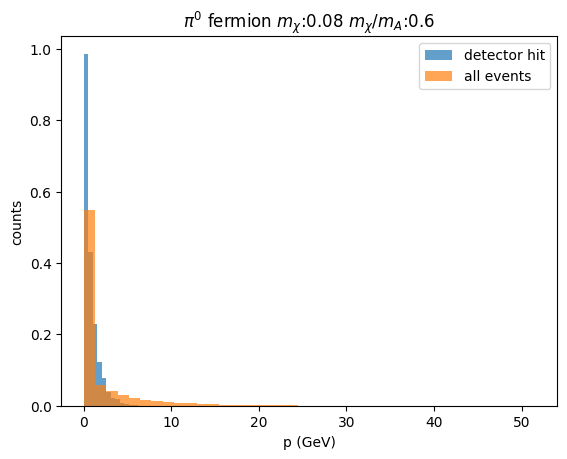

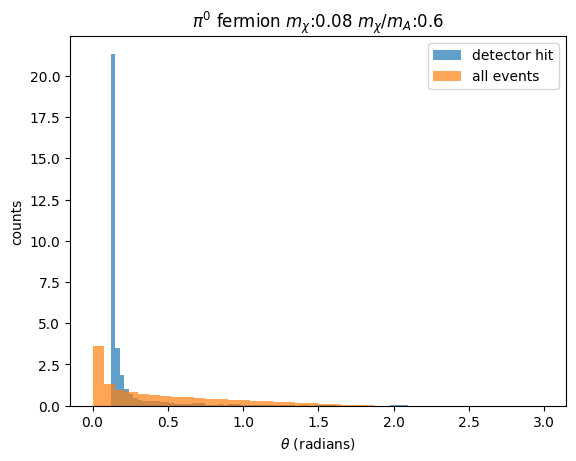

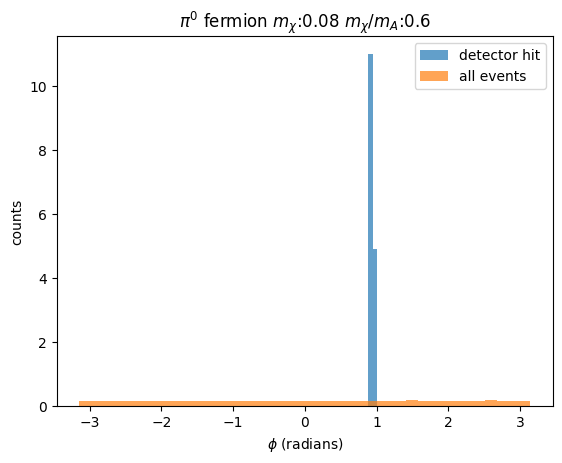

In [91]:
dm_type = ['fermion','scalar']
for type in dm_type:
    path_signal = f"../data/root_files/{type}_tmp/"
    path_bkg = f"../data/root_files/angular/{type}/"
    files = os.listdir(path_signal)
    for file in files[1:]:
        signal_momentum = get_momentum(file,path_signal)
        bkg_momentum = get_momentum(file,path_bkg)
        if bkg_momentum is None:
            continue
        if signal_momentum is None:
            continue
        
        signal_momentum = cartesian_to_spherical(signal_momentum)
        bkg_momentum = cartesian_to_spherical(bkg_momentum)
        origin_type, dm_type, mass, dt_ratio = get_name_info(file)
        lines = ['p','theta','phi']
        names = ['p (GeV)',rf'$\theta$ (radians)',rf'$\phi$ (radians)']
        for i in range(3):
            max_value = bkg_momentum[lines[i]].max()
            min_value = bkg_momentum[lines[i]].min()
            plt.hist(signal_momentum[lines[i]],bins=100,range=(min_value,max_value),alpha=0.7,label='detector hit',density=True)
            counts, bin_edges = np.histogram(bkg_momentum[lines[i]], bins=40, range=(min_value,max_value))
            plt.hist(bkg_momentum[lines[i]],bins=40,range=(min_value,max_value),alpha=0.7,label='all events',density=True)
            #check if $\{name}$ is a correct variable
            if origin_type == "pi0":
                new_type = "pi^0"
            plt.title(rf"$\{new_type}$ {dm_type} $m_\chi$:{mass} $m_\chi/m_A$:{dt_ratio}")
            plt.xlabel(names[i])
            plt.ylabel('counts')
            plt.legend()
            plt.show()
        
        break
    break
        



(         px        py        pz
 0 -0.557042 -0.099055  9.161774
 1 -0.239679 -0.044489  3.648656
 2  0.107429  0.372222  7.725421
 3 -0.131766  0.103079  8.527313
 4 -0.482299  0.267939  8.014097,
          px        py        pz
 0 -0.557042 -0.099055  9.161774
 1 -0.239679 -0.044489  3.648656
 2  0.107429  0.372222  7.725421
 3 -0.131766  0.103079  8.527313
 4 -0.482299  0.267939  8.014097)

          px    py    pz
0       True  True  True
1       True  True  True
2       True  True  True
3       True  True  True
4       True  True  True
...      ...   ...   ...
99997   True  True  True
99998   True  True  True
99999   True  True  True
100000  True  True  True
100001  True  True  True

[100002 rows x 3 columns]
